## Get dataset statistics
\textbf{Total samples}  & \textbf{Sample length} & \textbf{Total entities} & \textbf{Entity count}

In [17]:
import sys
import os

thesis_path = "/" + os.path.join(*os.getcwd().split(os.path.sep)[:-1])
sys.path.append(thesis_path)

In [18]:
files = {
    "lowner": {
        "train":
        os.path.join(thesis_path, "data", "mlowner", "lowner_train.json"),
        "dev":
        os.path.join(thesis_path, "data", "mlowner", "lowner_dev.json"),
        "test":
        os.path.join(thesis_path, "data", "mlowner", "lowner_test.json"),
        "gazetteer":
        os.path.join(thesis_path, "data", "mlowner", "lowner_gazetteer.json")
    },
    "multiconer": {
        "test":
        os.path.join(thesis_path, "data", "multiconer",
                     "filtered_multiconer.json")
    },
    "wnut": {
        "train": os.path.join(thesis_path, "data", "wnut", "wnut_train.json"),
        "dev": os.path.join(thesis_path, "data", "wnut", "wnut_dev.json"),
        "test": os.path.join(thesis_path, "data", "wnut", "wnut_test.json")
    }
}

In [7]:
import json
from collections import Counter
from statistics import mean, stdev
import pandas as pd
dataset_stats = []
for dataset, split in files.items():
    for part, filepath in split.items():
        with open(filepath) as file:
            samples = json.load(file)
        total_samples = len(samples)
        if "tokens" in samples[0]:
            sample_lens = [len(sample["tokens"]) for sample in samples]
            sample_entity_count = [len(sample["entities"]) for sample in samples]
            entities = [
                ent["type"] for sample in samples for ent in sample["entities"]
            ]
        else:
            sample_lens = [len(sample["entity"].split(" ")) for sample in samples]
            sample_entity_count = [
                1 for _ in samples
            ]
            entities = [sample["type"] for sample in samples]
        entity_count = dict(Counter(entities))
        dataset_stats.append({
            "dataset": "_".join([dataset, part]),
            "total samples": total_samples,
            "sample len avg": mean(sample_lens),
            "sample len std": stdev(sample_lens),
            "total entities": sum(sample_entity_count),
            "entity count avg": mean(sample_entity_count),
            "entity count std": stdev(sample_entity_count),
            **entity_count
        })

dataset_stats_df = pd.DataFrame.from_records(dataset_stats)


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:9                                                                                    │
│                                                                                                  │
│    6 for dataset, split in files.items():                                                        │
│    7 │   for part, filepath in split.items():                                                    │
│    8 │   │   with open(filepath) as file:                                                        │
│ ❱  9 │   │   │   samples = json.load(file)                                                       │
│   10 │   │   total_samples = len(samples)                                                        │
│   11 │   │   if "tokens" in samples[0]:                                                          │
│   12 │   │   │   sample_lens = [len(sample["tokens"]) for sample in samples]                     │
│                                                                                                  │
│ /home/loebbert/miniconda3/envs/haystack/lib/python3.10/json/__init__.py:293 in load              │
│                                                                                                  │
│   290 │   To use a custom ``JSONDecoder`` subclass, specify it with the ``cls``                  │
│   291 │   kwarg; otherwise ``JSONDecoder`` is used.                                              │
│   292 │   """                                                                                    │
│ ❱ 293 │   return loads(fp.read(),                                                                │
│   294 │   │   cls=cls, object_hook=object_hook,                                                  │
│   295 │   │   parse_float=parse_float, parse_int=parse_int,                                      │
│   296 │   │   parse_constant=parse_constant, object_pairs_hook=object_pairs_hook, **kw)          │
│                                                                                                  │
│ /home/loebbert/miniconda3/envs/haystack/lib/python3.10/json/__init__.py:346 in loads             │
│                                                                                                  │
│   343 │   if (cls is None and object_hook is None and                                            │
│   344 │   │   │   parse_int is None and parse_float is None and                                  │
│   345 │   │   │   parse_constant is None and object_pairs_hook is None and not kw):              │
│ ❱ 346 │   │   return _default_decoder.decode(s)                                                  │
│   347 │   if cls is None:                                                                        │
│   348 │   │   cls = JSONDecoder                                                                  │
│   349 │   if object_hook is not None:                                                            │
│                                                                                                  │
│ /home/loebbert/miniconda3/envs/haystack/lib/python3.10/json/decoder.py:337 in decode             │
│                                                                                                  │
│   334 │   │   containing a JSON document).                                                       │
│   335 │   │                                                                                      │
│   336 │   │   """                                                                                │
│ ❱ 337 │   │   obj, end = self.raw_decode(s, idx=_w(s, 0).end())                                  │
│   338 │   │   end = _w(s, end).end()                                                             │
│   339 │   │   if end != len(s):                                                                  │
│   340 │   │   │   raise JSONDecodeError("Extra data", s, en

In [ ]:
dataset_stats_df

,dataset,total samples,sample len avg,sample len std,total entities,entity count avg,entity count std,person,group,corporation,location,creative-work,product
0,lowner_train,13423,15.404232,6.356497,17368,1.293899,1.026238,5412,2525,789,6196,1960,486
1,lowner_dev,3366,15.344920,6.280718,4338,1.288770,1.017720,1282,635,177,1625,515,104
2,lowner_test,33661,15.339354,6.280033,43716,1.298714,1.025310,13375,6477,2033,15871,4795,1165
3,lowner_gazetteer,3773535,2.507388,1.327975,3773535,1.000000,0.000000,1797893,227833,72106,1118002,490584,67117
4,multiconer_test,215680,9.959477,7.511505,270306,1.253273,0.659560,55245,40128,37235,58486,42571,36641
5,wnut_train,3394,18.482616,7.474556,1975,0.581909,0.959500,660,264,221,548,140,142
6,wnut_dev,1009,15.592666,10.800940,836,0.828543,0.828161,470,39,34,74,105,114
7,wnut_test,1287,18.177156,14.372180,1079,0.838384,1.053906,429,165,66,150,142,127


In [ ]:
dataset_stats_df["dataset"].tolist()

['lowner_train',
 'lowner_dev',
 'lowner_test',
 'lowner_gazetteer',
 'multiconer_test',
 'wnut_train',
 'wnut_dev',
 'wnut_test']

In [ ]:
dataset_stats_df.to_pickle(os.path.join(thesis_path, "evaluations", "metrics", "00_dataset_stats.pkl.tar.gz"))

In [ ]:
# first table to latex
from evaluations.utils import LATEX_DATASET_NAMES

major_df = dataset_stats_df[[
    "dataset", "total samples", "sample len avg", "sample len std",
    "total entities", "entity count avg", "entity count std"
]]
round_last_digits = 2
major_df["Dataset"] = major_df["dataset"].apply(lambda x: LATEX_DATASET_NAMES[x])
major_df["Total samples"] = major_df["total samples"]
major_df["Sample length"] = major_df["sample len avg"].map(
    lambda x: '{:,.{prec}f}'.format(x, prec=round_last_digits)) + " (" + (
        round(major_df["sample len std"] *
              10**round_last_digits)).astype(int).astype(str) + ")"
major_df["Total entities"] = major_df["total entities"]
major_df["Entity count"] = major_df["entity count avg"].map(
    lambda x: '{:,.{prec}f}'.format(x, prec=round_last_digits)) + " (" + (
        round(major_df["entity count std"] *
              10**round_last_digits)).astype(int).astype(str) + ")"

major_df.set_index("Dataset", inplace=True)
print(major_df[[
    "Total samples", "Sample length", "Total entities", "Entity count"
]].style.to_latex(
    siunitx=True,
    hrules=True,
    multirow_align="t",
    column_format=
    "@{}llSS[table-format = 2.2 (2)]SS[table-format = 2.2 (2)]@{} "))


\begin{tabular}{@{}llSS[table-format = 2.2 (2)]SS[table-format = 2.2 (2)]@{}}
\toprule
{} & {Total samples} & {Sample length} & {Total entities} & {Entity count} \\
{Dataset} & {} & {} & {} & {} \\
\midrule
LOWNER\textsubscript{train} & 13423 & 15.40 (636) & 17368 & 1.29 (103) \\
LOWNER\textsubscript{dev} & 3366 & 15.34 (628) & 4338 & 1.29 (102) \\
LOWNER\textsubscript{test} & 33661 & 15.34 (628) & 43716 & 1.30 (103) \\
LOWNER\textsubscript{gazetteer} & 3773535 & 2.51 (133) & 3773535 & 1.00 (0) \\
MultiCoNER\textsubscript{test} & 215680 & 9.96 (751) & 270306 & 1.25 (66) \\
WNUT-17\textsubscript{train} & 3394 & 18.48 (747) & 1975 & 0.58 (96) \\
WNUT-17\textsubscript{dev} & 1009 & 15.59 (1080) & 836 & 0.83 (83) \\
WNUT-17\textsubscript{test} & 1287 & 18.18 (1437) & 1079 & 0.84 (105) \\
\bottomrule
\end{tabular}



/tmp/ipykernel_29834/4256601931.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  major_df["Dataset"] = major_df["dataset"].apply(lambda x: LATEX_DATASET_NAMES[x])
/tmp/ipykernel_29834/4256601931.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  major_df["Total samples"] = major_df["total samples"]
/tmp/ipykernel_29834/4256601931.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [ ]:
# second table per type
from evaluations.utils import ENTITY_NAMES
type_df = dataset_stats_df[[
    "dataset", *ENTITY_NAMES.keys()
]]
type_df["Dataset"] = type_df["dataset"].apply(
    lambda x: LATEX_DATASET_NAMES[x])
for entity_type, entity_name in ENTITY_NAMES.items():
    type_df[entity_name] = type_df[entity_type]

type_df.set_index("Dataset", inplace=True)

print(type_df[[*ENTITY_NAMES.values()]].style.to_latex(
    siunitx=True,
    hrules=True,
    multirow_align="t",
    column_format=
    "@{}lSSSSSS@{}"))

\begin{tabular}{@{}lSSSSSS@{}}
\toprule
{} & {Person} & {Location} & {Group} & {Corporation} & {Creative Work} & {Product} \\
{Dataset} & {} & {} & {} & {} & {} & {} \\
\midrule
LOWNER\textsubscript{train} & 5412 & 6196 & 2525 & 789 & 1960 & 486 \\
LOWNER\textsubscript{dev} & 1282 & 1625 & 635 & 177 & 515 & 104 \\
LOWNER\textsubscript{test} & 13375 & 15871 & 6477 & 2033 & 4795 & 1165 \\
LOWNER\textsubscript{gazetteer} & 1797893 & 1118002 & 227833 & 72106 & 490584 & 67117 \\
MultiCoNER\textsubscript{test} & 55245 & 58486 & 40128 & 37235 & 42571 & 36641 \\
WNUT-17\textsubscript{train} & 660 & 548 & 264 & 221 & 140 & 142 \\
WNUT-17\textsubscript{dev} & 470 & 74 & 39 & 34 & 105 & 114 \\
WNUT-17\textsubscript{test} & 429 & 150 & 165 & 66 & 142 & 127 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_29834/3633384489.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_df["Dataset"] = type_df["dataset"].apply(
/tmp/ipykernel_29834/3633384489.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_df[entity_name] = type_df[entity_type]
/tmp/ipykernel_29834/3633384489.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

## Get EECR and Top-1 Cosine Similarity for each dataset

In [3]:
from data_metrics.sample_similarity import confusion_matrix_sample_similarity
import json

datasets = []
dataset_names = []
for dataset, split in files.items():
    for part, filepath in split.items():
        if part == "gazetteer" or dataset == "multiconer":
            continue
        with open(filepath) as file:
            samples = json.load(file)
        datasets.append(samples)
        dataset_names.append("_".join([dataset, part]))

conf_matrix_sample_sim = confusion_matrix_sample_similarity(datasets=datasets, names=dataset_names)
conf_matrix_sample_sim.to_pickle(os.path.join(thesis_path, "evaluations", "metrics", "00_datasets_conf_matrix_sample_sim.pkl.tar.gz"))

/home/loebbert/miniconda3/envs/haystack/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
wnut_test_sent to wnut_test_sent : 100%|██████████| 1287/1287 [00:00<00:00, 19556.17it/s]


In [27]:
import pandas as pd

conf_matrix_sample_sim = pd.read_pickle(
    os.path.join(thesis_path, "evaluations", "metrics",
                 "00_datasets_conf_matrix_sample_sim.pkl.tar.gz"))
conf_matrix_sample_sim

,first,second,context_type,data_id,cosine_similarity
0,lowner_train,lowner_train,full,lowner_train_0,1.0
1,lowner_train,lowner_train,full,lowner_train_1,1.0
2,lowner_train,lowner_train,full,lowner_train_2,1.0
3,lowner_train,lowner_train,full,lowner_train_3,1.0
4,lowner_train,lowner_train,full,lowner_train_4,1.0
...,...,...,...,...,...
392975,wnut_test,wnut_test,full,wnut_test_1282,1.0
392976,wnut_test,wnut_test,full,wnut_test_1283,1.0
392977,wnut_test,wnut_test,full,wnut_test_1284,1.0
392978,wnut_test,wnut_test,full,wnut_test_1285,1.0


In [28]:
conf_matrix = conf_matrix_sample_sim.pivot_table("cosine_similarity",
                                                 index=["first", "second"],
                                                 aggfunc="mean").reset_index()
conf_matrix_list = conf_matrix.to_dict(orient="records")

In [29]:
from itertools import product
import pandas as pd
import numpy as np

for left, right in list(product(["lowner_gazetteer", "multiconer_test"], [
    'lowner_dev', 'lowner_test', 'lowner_train', 'wnut_dev', 'wnut_test',
    'wnut_train'
])):
    conf_matrix_list.append({"first": left, "second": right, "cosine_similarity": np.nan})
    conf_matrix_list.append({
        "first": right,
        "second": left,
        "cosine_similarity": np.nan
    })

conf_matrix = pd.DataFrame.from_records(conf_matrix_list)
conf_matrix


,first,second,cosine_similarity
0,lowner_dev,lowner_dev,1.000000
1,lowner_dev,lowner_test,0.509971
2,lowner_dev,lowner_train,0.509533
3,lowner_dev,wnut_dev,0.355700
4,lowner_dev,wnut_test,0.350367
5,lowner_dev,wnut_train,0.347444
6,lowner_test,lowner_dev,0.597666
7,lowner_test,lowner_test,0.999970
8,lowner_test,lowner_train,0.596669
9,lowner_test,wnut_dev,0.424612


In [30]:
conf_matrix_df = conf_matrix.pivot_table(values="cosine_similarity", index="first", columns="second", dropna=False)
conf_matrix_df

second,lowner_dev,lowner_gazetteer,lowner_test,lowner_train,multiconer_test,wnut_dev,wnut_test,wnut_train
first,,,,,,,,
lowner_dev,1.000000,NaN,0.509971,0.509533,NaN,0.355700,0.350367,0.347444
lowner_gazetteer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lowner_test,0.597666,NaN,0.999970,0.596669,NaN,0.424612,0.417165,0.413057
lowner_train,0.565342,NaN,0.563979,1.000000,NaN,0.394530,0.388323,0.389493
multiconer_test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wnut_dev,0.322268,NaN,0.321725,0.320629,NaN,1.000000,0.348077,0.391779
wnut_test,0.334780,NaN,0.331989,0.331634,NaN,0.374799,1.000000,0.444991
wnut_train,0.346594,NaN,0.346341,0.345203,NaN,0.402929,0.411325,1.000000


In [31]:
from evaluations.utils import PLOT_DATASET_NAMES, DATASET_ORDER

sorted_matrix_df = conf_matrix_df.reset_index()
sorted_matrix_df.sort_values(
    "first", key=lambda x: x.apply(lambda y: DATASET_ORDER.get(y, 1000)), inplace=True)
sorted_matrix_df["first"] = sorted_matrix_df["first"].map(
    lambda x: PLOT_DATASET_NAMES[x])
sorted_matrix_df.columns = sorted_matrix_df.columns.map(
    lambda x: PLOT_DATASET_NAMES[x] if x in PLOT_DATASET_NAMES else "First")
sorted_matrix_df.columns.name = "Second"
sorted_matrix_df.set_index("First", inplace=True)
sorted_matrix_df[[*PLOT_DATASET_NAMES.values()]]

Second,LOWNER$_{train}$,LOWNER$_{dev}$,LOWNER$_{test}$,LOWNER$_{gazetteer}$,MultiCoNER$_{test}$,WNUT-17$_{train}$,WNUT-17$_{dev}$,WNUT-17$_{test}$
First,,,,,,,,
LOWNER$_{train}$,1.000000,0.565342,0.563979,NaN,NaN,0.389493,0.394530,0.388323
LOWNER$_{dev}$,0.509533,1.000000,0.509971,NaN,NaN,0.347444,0.355700,0.350367
LOWNER$_{test}$,0.596669,0.597666,0.999970,NaN,NaN,0.413057,0.424612,0.417165
LOWNER$_{gazetteer}$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultiCoNER$_{test}$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WNUT-17$_{train}$,0.345203,0.346594,0.346341,NaN,NaN,1.000000,0.402929,0.411325
WNUT-17$_{dev}$,0.320629,0.322268,0.321725,NaN,NaN,0.391779,1.000000,0.348077
WNUT-17$_{test}$,0.331634,0.334780,0.331989,NaN,NaN,0.444991,0.374799,1.000000


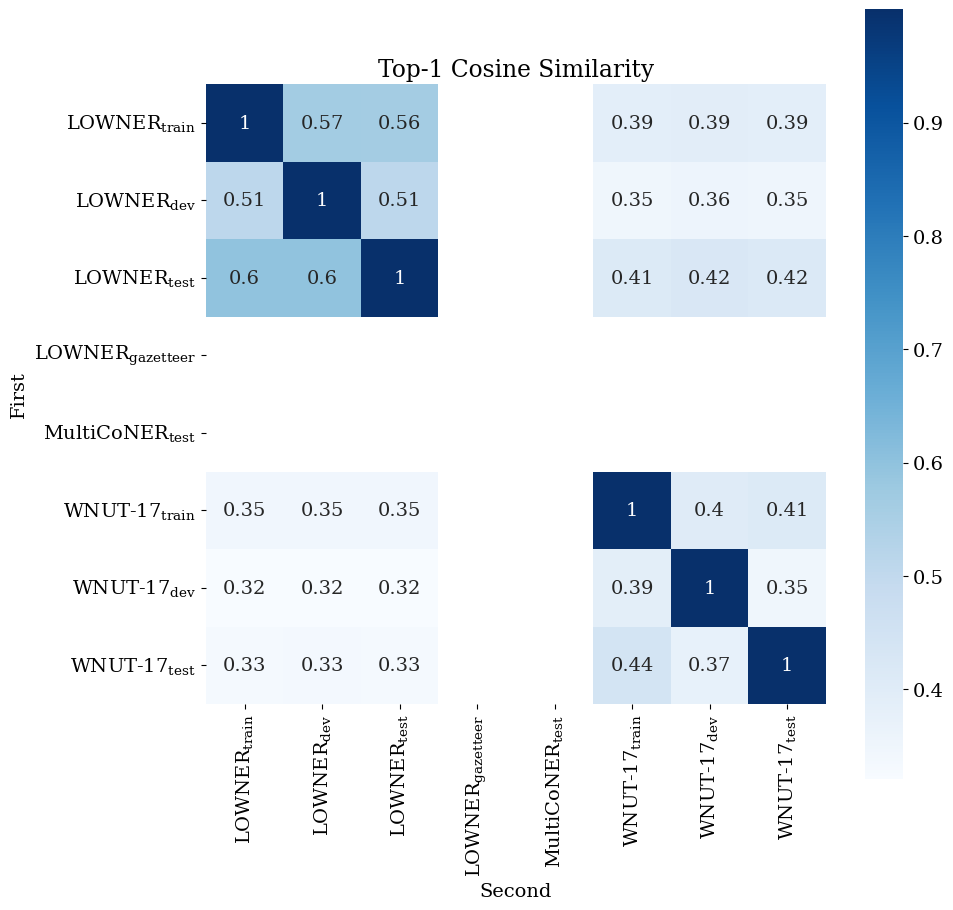

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(sorted_matrix_df[[*PLOT_DATASET_NAMES.values()]],
            annot=True,
            cmap=sns.color_palette("Blues", as_cmap=True), square=True)
plt.title("Top-1 Cosine Similarity")
LATEX_THESIS_PATH = "/home/loebbert/OneDrive/Studium/Master/Masterarbeit/Thesis"
os.makedirs(
    os.path.dirname(
        os.path.join(LATEX_THESIS_PATH, "drawings", "00_datasets",
                     "top-1-cosine-sim.png")), exist_ok=True)
plt.savefig(os.path.join(LATEX_THESIS_PATH, "drawings", "00_datasets",
                         "top-1-cosine-sim.png"),bbox_inches="tight",
            dpi=200)

# Get EECR

In [19]:
from data_metrics.entity_coverage_ratio import confusion_matrix_expected_entity_coverage_ratio
import json

datasets = []
dataset_names = []
for dataset, split in files.items():
    for part, filepath in split.items():
        with open(filepath) as file:
            samples = json.load(file)
        datasets.append(samples)
        dataset_names.append("_".join([dataset, part]))

conf_matrix_eecr = confusion_matrix_expected_entity_coverage_ratio(datasets, dataset_names)
conf_matrix_eecr.to_pickle(
    os.path.join(thesis_path, "evaluations", "metrics",
                 "00_datasets_conf_matrix_eecr.pkl.tar.gz"))


Expected Entity Coverage Ratio: 100%|██████████| 64/64 [00:00<00:00, 573580.03it/s]


In [33]:
import pandas as pd

conf_matrix_eecr = pd.read_pickle(
    os.path.join(thesis_path, "evaluations", "metrics",
                 "00_datasets_conf_matrix_eecr.pkl.tar.gz"))
conf_matrix_eecr

,first,second,expected_entity_coverage_ratio
0,lowner_train,lowner_train,0.9948
1,lowner_train,lowner_dev,0.2957
2,lowner_train,lowner_test,0.2930
3,lowner_train,lowner_gazetteer,0.0059
4,lowner_train,multiconer_test,0.1396
...,...,...,...
59,wnut_test,lowner_gazetteer,0.0003
60,wnut_test,multiconer_test,0.0068
61,wnut_test,wnut_train,0.0137
62,wnut_test,wnut_dev,0.0831


In [34]:
conf_matrix_df = conf_matrix_eecr.pivot_table(
    values="expected_entity_coverage_ratio",
    index="first",
    columns="second",
    dropna=False)
conf_matrix_df

second,lowner_dev,lowner_gazetteer,lowner_test,lowner_train,multiconer_test,wnut_dev,wnut_test,wnut_train
first,,,,,,,,
lowner_dev,0.9973,0.0018,0.1747,0.1713,0.0694,0.0443,0.0408,0.0759
lowner_gazetteer,0.8330,0.9856,0.8349,0.8382,0.8952,0.3302,0.2948,0.4132
lowner_test,0.3892,0.0122,0.9920,0.3865,0.2032,0.1265,0.1089,0.2050
lowner_train,0.2957,0.0059,0.2930,0.9948,0.1396,0.0703,0.0815,0.1497
multiconer_test,0.4840,0.0578,0.4878,0.4847,0.9906,0.1509,0.1413,0.2493
wnut_dev,0.0235,0.0003,0.0204,0.0190,0.0065,0.9907,0.0785,0.0197
wnut_test,0.0173,0.0003,0.0194,0.0166,0.0068,0.0831,0.9889,0.0137
wnut_train,0.0543,0.0007,0.0516,0.0492,0.0208,0.0311,0.0185,0.9920


In [35]:
from evaluations.utils import PLOT_DATASET_NAMES, DATASET_ORDER

sorted_matrix_df = conf_matrix_df.reset_index()
sorted_matrix_df.sort_values(
    "first",
    key=lambda x: x.apply(lambda y: DATASET_ORDER.get(y, 1000)),
    inplace=True)
sorted_matrix_df["first"] = sorted_matrix_df["first"].map(
    lambda x: PLOT_DATASET_NAMES[x])
sorted_matrix_df.columns = sorted_matrix_df.columns.map(
    lambda x: PLOT_DATASET_NAMES[x] if x in PLOT_DATASET_NAMES else "First")
sorted_matrix_df.columns.name = "Second"
sorted_matrix_df.set_index("First", inplace=True)
sorted_matrix_df[[*PLOT_DATASET_NAMES.values()]]

Second,LOWNER$_{train}$,LOWNER$_{dev}$,LOWNER$_{test}$,LOWNER$_{gazetteer}$,MultiCoNER$_{test}$,WNUT-17$_{train}$,WNUT-17$_{dev}$,WNUT-17$_{test}$
First,,,,,,,,
LOWNER$_{train}$,0.9948,0.2957,0.2930,0.0059,0.1396,0.1497,0.0703,0.0815
LOWNER$_{dev}$,0.1713,0.9973,0.1747,0.0018,0.0694,0.0759,0.0443,0.0408
LOWNER$_{test}$,0.3865,0.3892,0.9920,0.0122,0.2032,0.2050,0.1265,0.1089
LOWNER$_{gazetteer}$,0.8382,0.8330,0.8349,0.9856,0.8952,0.4132,0.3302,0.2948
MultiCoNER$_{test}$,0.4847,0.4840,0.4878,0.0578,0.9906,0.2493,0.1509,0.1413
WNUT-17$_{train}$,0.0492,0.0543,0.0516,0.0007,0.0208,0.9920,0.0311,0.0185
WNUT-17$_{dev}$,0.0190,0.0235,0.0204,0.0003,0.0065,0.0197,0.9907,0.0785
WNUT-17$_{test}$,0.0166,0.0173,0.0194,0.0003,0.0068,0.0137,0.0831,0.9889


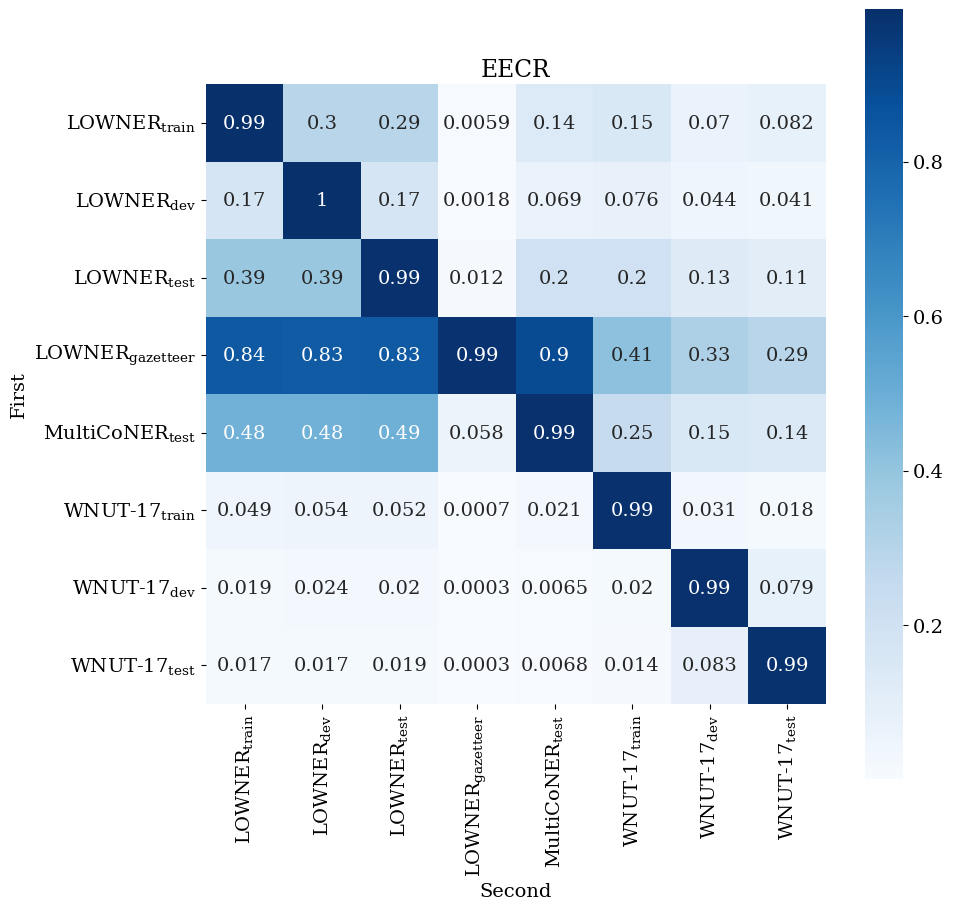

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(sorted_matrix_df[[*PLOT_DATASET_NAMES.values()]],
            annot=True,
            cmap=sns.color_palette("Blues", as_cmap=True), square=True)
plt.title("EECR")
LATEX_THESIS_PATH = "/home/loebbert/OneDrive/Studium/Master/Masterarbeit/Thesis"
os.makedirs(os.path.dirname(
    os.path.join(LATEX_THESIS_PATH, "drawings", "00_datasets",
                 "eecr.png")),
            exist_ok=True)
plt.savefig(os.path.join(LATEX_THESIS_PATH, "drawings", "00_datasets",
                         "eecr.png"),
            bbox_inches="tight",
            dpi=200)